# Выбор локации для скважины

## Содержание проекта

1. Введение  
    1.1. Описание проекта  
    1.2. Описание данных  
2. Загрузка и подготовка данных  
    2.1. Регион 0  
    2.2. Регион 1  
    2.3. Регион 2  
3. Обучение и проверка модели  
    3.1. Регион 0  
    3.2. Регион 1  
    3.3. Регион 2  
4. Подготовка к расчёту прибыли  
5. Расчёт прибыли и рисков  
6. Выводы  

## Введение

### Описание проекта

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

**Данные**: пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

**Задача**: построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

**Шаги** для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных

Данные геологоразведки трёх регионов находятся в файлах, каждый из наборов данных состоит из следующих признаков:
- *id* — уникальный идентификатор скважины;
- *f0, f1, f2* — три признака точек (неважно, что они означают, но сами признаки значимы);
- *product* — объём запасов в скважине (тыс. баррелей).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from scipy import stats

from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [7]:
def intro(data):
    info = data.info()
    head = data.head()
    return info, head

def visual(data):
    data.hist(figsize=(5,5), color='grey', rwidth=0.85)
    plt.suptitle('Распределение признаков');
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    f, ax = plt.subplots(figsize=[6,5])
    sns.heatmap(data.corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Проценты %'},cmap="Greys",ax=ax)
    ax.set_title('Корреляция признаков');
    
def train_valid_split(data):
    features = data.drop('product', axis=1)
    target = data['product']

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

## Загрузка и подготовка данных

### Регион 0

In [8]:
data_0 = pd.read_csv('geo_data_0.csv')
intro(data_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(None,
       id        f0        f1        f2     product
 0  txEyH  0.705745 -0.497823  1.221170  105.280062
 1  2acmU  1.334711 -0.340164  4.365080   73.037750
 2  409Wp  1.022732  0.151990  1.419926   85.265647
 3  iJLyR -0.032172  0.139033  2.978566  168.620776
 4  Xdl7t  1.988431  0.155413  4.751769  154.036647)

In [9]:
data_0 = data_0.drop_duplicates(subset='id')
data_0.shape

(99990, 5)

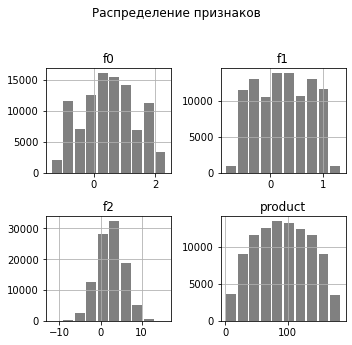

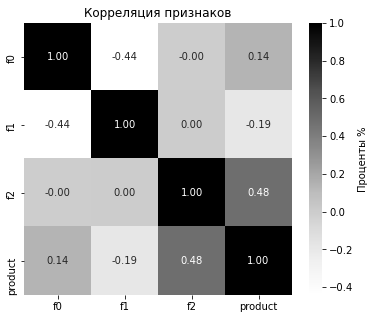

In [10]:
# data_0 = data_0['id'].drop_duplicates()
data_0 = data_0.drop(['id'], 1)
visual(data_0)

### Регион 1

In [35]:
data_1 = pd.read_csv('geo_data_1.csv')
intro(data_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(None,
       id         f0         f1        f2     product
 0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
 1  62mP7  14.272088  -3.475083  0.999183   26.953261
 2  vyE1P   6.263187  -5.948386  5.001160  134.766305
 3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
 4  AHL4O  12.702195  -8.147433  5.004363  134.766305)

In [36]:
data_1 = data_1.drop_duplicates(subset='id')
data_1.shape

(99996, 5)

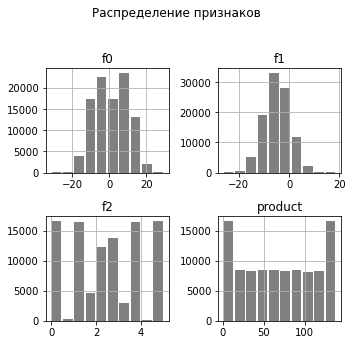

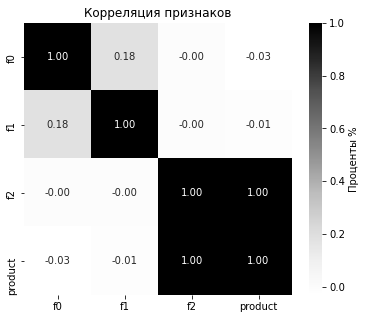

In [37]:
data_1 = data_1.drop(['id'], 1)
visual(data_1)

### Регион 2

In [46]:
data_2 = pd.read_csv('geo_data_2.csv')
intro(data_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(None,
       id        f0        f1        f2     product
 0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
 1  WJtFt  0.262778  0.269839 -2.530187   56.069697
 2  ovLUW  0.194587  0.289035 -5.586433   62.871910
 3  q6cA6  2.236060 -0.553760  0.930038  114.572842
 4  WPMUX -0.515993  1.716266  5.899011  149.600746)

In [47]:
data_2 = data_2.drop_duplicates(subset='id')
data_2.shape

(99996, 5)

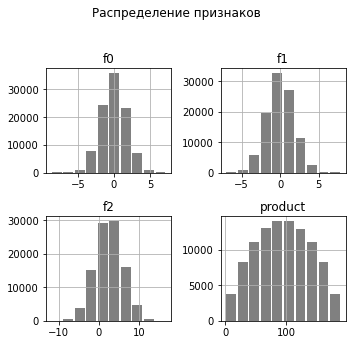

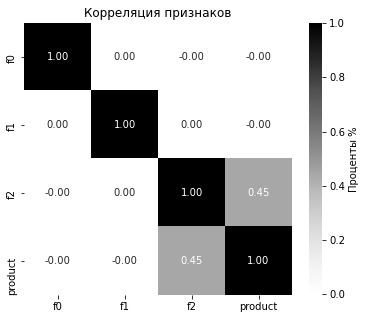

In [48]:
data_2 = data_2.drop(['id'], 1)
visual(data_2)

**Выводы**:  В данных отсутствуют пропущенные значения. Дубликаты в столбцах с id были удалены. В одном из регионов есть признак, на 100% коррелирующий с целевой меткой. Решено было его не удалять, так как удаление не давало улучшения качества модели. 

## Обучение и проверка модели

### Регион 0

In [15]:
(features_train_0, features_valid_0, 
 target_train_0, target_valid_0) = train_valid_split(data_0)

print('Обучающая выборка:', features_train_0.shape, target_train_0.shape)
print('Валидационная выборка:', features_valid_0.shape, target_valid_0.shape)

Обучающая выборка: (74992, 3) (74992,)
Валидационная выборка: (24998, 3) (24998,)


In [26]:
model_0 = LinearRegression().fit(features_train_0, target_train_0)
predictions_0 = pd.Series(model_0.predict(features_valid_0), index=target_valid_0.index)

mse_0 = mean_squared_error(predictions_0, target_valid_0)

print(f'Реальный средний запас сырья в регионе 0: {target_valid_0.mean():.2f}')
print(f'Предсказанный средний запас сырья в регионе 0: {predictions_0.mean():.2f}')
print(f'RMSE: {mse_0 ** 0.5:.2f}')

Реальный средний запас сырья в регионе 0: 92.16
Предсказанный средний запас сырья в регионе 0: 92.79
RMSE: 37.85


In [27]:
predictions_0.reset_index(inplace=True, drop=True)
target_valid_0.reset_index(inplace=True, drop=True)

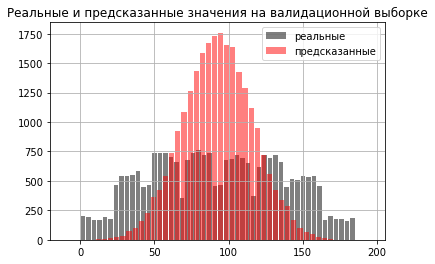

In [28]:
target_valid_0.hist(bins=50, rwidth=0.85, alpha=.5, color='black');
predictions_0.hist(bins=50, rwidth=0.85, alpha=.5, color='red');
plt.title('Реальные и предсказанные значения на валидационной выборке');
plt.legend(['реальные', 'предсказанные']);

**Выводы:**  средние реальных и предсказанных значений в *Регионе 0* не сильно отличаются (*92.16* реальных против *92.78* предсказанных), но ошибка RMSE довольно большая (*37.85*), потому что распределение значений устроено по-разному, что видно на гистограмме.

### Регион 1

In [38]:
(features_train_1, features_valid_1, 
 target_train_1, target_valid_1) = train_valid_split(data_1)

print('Обучающая выборка:', features_train_1.shape, target_train_1.shape)
print('Валидационная выборка:', features_valid_1.shape, target_valid_1.shape)

Обучающая выборка: (74997, 3) (74997,)
Валидационная выборка: (24999, 3) (24999,)


In [41]:
model_1 = LinearRegression().fit(features_train_1, target_train_1)
predictions_1 = pd.Series(model_1.predict(features_valid_1))
mse_1 = mean_squared_error(predictions_1, target_valid_1)

print(f'Средний запас сырья в регионе 1: {target_valid_1.mean():.2f}')
print(f'Средний запас предсказанного сырья: {predictions_1.mean():.2f}')
print(f'RMSE: {mse_1 ** 0.5:.2f}')

Средний запас сырья в регионе 1: 69.19
Средний запас предсказанного сырья: 69.18
RMSE: 0.89


In [42]:
predictions_1.reset_index(inplace=True, drop=True)
target_valid_1.reset_index(inplace=True, drop=True)

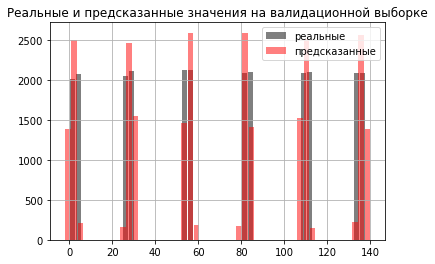

In [43]:
target_valid_1.hist(bins=50, rwidth=0.85, alpha=.5, color='black');
pd.Series(predictions_1).hist(bins=50, rwidth=0.85, alpha=.5, color='red');
plt.title('Реальные и предсказанные значения на валидационной выборке');
plt.legend(['реальные', 'предсказанные']);

**Выводы:** в *Регионе 1* одна из меток в этой выборке на 100% коррелировала с целевой меткой, поэтому получилась маленькая ошибка RMSE (*0.89*).

### Регион 2

In [49]:
(features_train_2, features_valid_2, 
 target_train_2, target_valid_2) = train_valid_split(data_2)

print('Обучающая выборка:', features_train_2.shape, target_train_2.shape)
print('Валидационная выборка:', features_valid_2.shape, target_valid_2.shape)

Обучающая выборка: (74997, 3) (74997,)
Валидационная выборка: (24999, 3) (24999,)


In [51]:
model_2 = LinearRegression().fit(features_train_2, target_train_2)
predictions_2 = pd.Series(model_2.predict(features_valid_2))
mse_2 = mean_squared_error(predictions_2, target_valid_2)

print(f'Средний запас сырья в регионе 2: {target_valid_2.mean():.2f}')
print(f'Средний запас предсказанного сырья: {predictions_2.mean():.2f}')
print(f'RMSE: {mse_2 ** 0.5:.2f}')

Средний запас сырья в регионе 2: 94.79
Средний запас предсказанного сырья: 94.87
RMSE: 40.08


In [52]:
predictions_2.reset_index(inplace=True, drop=True)
target_valid_2.reset_index(inplace=True, drop=True)

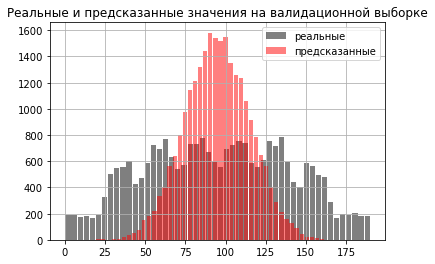

In [53]:
target_valid_2.hist(bins=50, rwidth=0.85, alpha=.5, color='black');
pd.Series(predictions_2).hist(bins=50, rwidth=0.85, alpha=.5, color='red');
plt.title('Реальные и предсказанные значения на валидационной выборке');
plt.legend(['реальные', 'предсказанные']);

**Выводы:**  в *Регионе 2* средние реальных и предсказанных значений не сильно отличаются (*94.78* и *94.86*), но ошибка RMSE большая (40.08), потому что распределение устроено по-разному, как и в *Регионе 0*.

## Подготовка к расчёту прибыли

- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

Подготовка к расчёту прибыли:
1. Все ключевые значения для расчётов сохраним в отдельных переменных.
2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

$$\text{Валовая прибыль = оборот - себестоимость}$$

In [54]:
BUDGET = 10_000_000_000
RUB_PER_TH_BARRELS = 450000

expected_barrels = BUDGET / RUB_PER_TH_BARRELS / 200
print(f'Объем сырья для разработки скважин в регионе: {expected_barrels:.2f}')

Объем сырья для разработки скважин в регионе: 111.11


In [55]:
print('Средний запас в регионе 0:', round(target_valid_0.mean(), 2))
print('Средний запас в регионе 1:', round(target_valid_1.mean(), 2))
print('Средний запас в регионе 2:', round(target_valid_2.mean(), 2))

Средний запас в регионе 0: 92.16
Средний запас в регионе 1: 69.19
Средний запас в регионе 2: 94.79


**Вывод:** Средний запас по всем регионам меньше, чем необходимый безубыточный объем. Скорее всего, это связано с тем, что попадаются скважины с маленьким содержанием сырья.

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

1. Выберем скважины с максимальными значениями предсказаний.  
2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.  
3. Рассчитаем прибыль для полученного объёма сырья.  

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [56]:
def calculate_profit(predictions, target_valid):
    barrels_sorted = predictions.sort_values(ascending=False)
    selected = target_valid[barrels_sorted.index][:200]
    return selected.sum() * RUB_PER_TH_BARRELS - BUDGET

In [57]:
print('Предполагаемая прибыль по 200 скважинам с максимальным содержанием сырья:')

profit_0 = calculate_profit(predictions_0, target_valid_0)
profit_1 = calculate_profit(predictions_1, target_valid_1)
profit_2 = calculate_profit(predictions_2, target_valid_2)

print('В регионе 0:', round(profit_0, 2))
print('В регионе 1:', round(profit_1, 2))
print('В регионе 2:', round(profit_2, 2))

Предполагаемая прибыль по 200 скважинам с максимальным содержанием сырья:
В регионе 0: 3365187237.7
В регионе 1: 2415086696.68
В регионе 2: 2501283853.28


Посчитаем риски и прибыль для каждого региона:  

1. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.  
2. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

In [58]:
def income_distribution(predictions, target, state):
    all_profit = []
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        profit = calculate_profit(predictions_subsample, target_subsample)
        all_profit.append(profit)
    all_profit = pd.Series(all_profit)
    lower = all_profit.quantile(0.025)
    upper = all_profit.quantile(0.975)
    return all_profit, lower, upper

In [59]:
state = np.random.RandomState(12345)

(all_profit_0, lower_0, upper_0) = income_distribution(predictions_0, target_valid_0, state)
(all_profit_1, lower_1, upper_1) = income_distribution(predictions_1, target_valid_1, state)
(all_profit_2, lower_2, upper_2) = income_distribution(predictions_2, target_valid_2, state)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [65]:
print(f'Средняя выручка в регионе 0: {all_profit_0.mean():.2f}')
print('Риск убытков:', stats.percentileofscore(all_profit_0, 0, kind='strict'), '%')
print(f'Доверительный интервал: {lower_0:.2f} - {upper_0:.2f}')
print()
print(f'Средняя выручка в регионе 1: {all_profit_1.mean():.2f}')
print('Риск убытков:', stats.percentileofscore(all_profit_1, 0, kind='strict'), '%')
print(f'Доверительный интервал: {lower_1:.2f} - {upper_1:.2f}')
print()
print(f'Средняя выручка в регионе 2: {all_profit_2.mean():.2f}')
print('Риск убытков:', round(stats.percentileofscore(all_profit_2, 0, kind='strict'), 2), '%')
print(f'Доверительный интервал: {lower_2:.2f} - {upper_2:.2f}')

Средняя выручка в регионе 0: 409428038.62
Риск убытков: 7.1 %
Доверительный интервал: -131536028.70 - 944395582.75

Средняя выручка в регионе 1: 536400199.44
Риск убытков: 0.3 %
Доверительный интервал: 112954247.12 - 998504156.65

Средняя выручка в регионе 2: 339478034.20
Риск убытков: 11.8 %
Доверительный интервал: -224089221.74 - 847067587.69


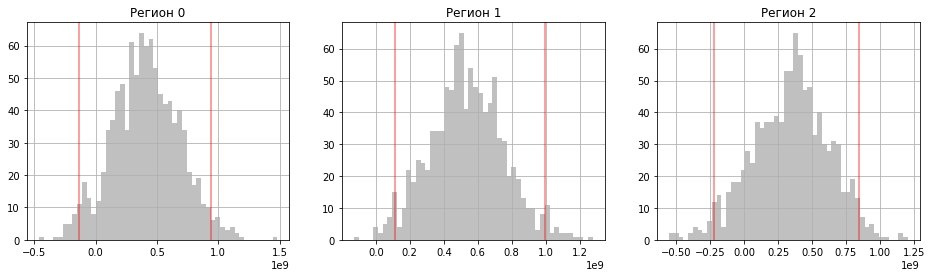

In [32]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(16,4))

all_profit_0.hist(bins=50, color='silver', ax=ax0);
ax0.axvline(x=lower_0, color='r', alpha=0.5);
ax0.axvline(x=upper_0, color='r', alpha=0.5);
ax0.set_title('Регион 0');

all_profit_1.hist(bins=50, color='silver', ax=ax1);
ax1.axvline(x=lower_1, color='r', alpha=0.5);
ax1.axvline(x=upper_1, color='r', alpha=0.5);
ax1.set_title('Регион 1');

all_profit_2.hist(bins=50, color='silver', ax=ax2);
ax2.axvline(x=lower_2, color='r', alpha=0.5);
ax2.axvline(x=upper_2, color='r', alpha=0.5);
ax2.set_title('Регион 2');

**Вывод**: Наибольшая доходность (*536400199.43*) ожидается в *Регионе 1*, этот же регион единственный проходит по критериям рисков, которые должны быть менее 2.5%. 

## Выводы

На основании предоставленных данных построены модели для рассчета объемов сырья в скважинах в трех регионах. Рассчитан средний запас сырья в каждом регионе, он составил 92.16, 69.19 и 94.79 соответственно. 

В соответствии с условиями рынка, каждая скважина должна иметь запасы минимум 111.11, чтобы оправдать затраты на разработку. Следовательно, из всех скважин нужно выбрать только те, в которых больше сырья.

Методом Bootstrap мы выбрали 500 случайных скважин из всех скважин региона, из этих 500 взяли 200 самых богатых сырьем и посчитали по ним прибыль и убытки. Оказалось, что самым подходящим для разработки является *Регион 1*, несмотря на то, что по среднему запасу сырья он был на последнем месте. Он демонстрирует доходность *536400199.43* и риск убытков *0.3 %*.